In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as web
import yfinance as yf
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.cluster import KMeans
from kneed import KneeLocator


ETFs=["SPY",   "IWM",   "LQD",   "EFA",   "EEM",   "FXI",   "EWJ",   "SPYG",
"IWD",   "XLK",   "XLV",   "XLF",   "XLU",   "XLI",   "XLP",   "XLE",
"XLB",   "XLY",   "AGG",   "SHY",   "TLT",   "QQQ",   "JNK",   "DBC",
"GLD",   "SPYV",  "MTUM" ]

return_history = yf.download(ETFs, start='2014-4-1', auto_adjust=True)['Close'].resample('ME').ffill().pct_change().dropna()
display(return_history)

with open("return_history.pickle", "wb") as f1:
    pickle.dump(return_history, f1)

[*********************100%***********************]  27 of 27 completed


Ticker,AGG,DBC,EEM,EFA,EWJ,FXI,GLD,IWD,IWM,JNK,...,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-31,0.011790,-0.014388,0.029518,0.015954,0.045126,0.054967,-0.030510,0.014068,0.007859,0.009160,...,0.029496,0.029579,0.016748,0.015027,0.019234,0.037586,0.018084,-0.010877,0.028734,0.028822
2014-06-30,-0.000575,0.021129,0.024018,0.009207,0.046823,0.019898,0.063190,0.025519,0.052720,0.009508,...,-0.002514,0.016145,0.055133,0.024226,0.004749,0.018689,-0.002533,0.044419,0.021215,0.019386
2014-07-31,-0.002509,-0.047404,0.013648,-0.026035,-0.003322,0.092603,-0.036317,-0.017081,-0.060543,-0.023762,...,0.006642,-0.019943,-0.034665,-0.014512,-0.041250,0.016949,-0.033169,-0.068007,0.001315,-0.012736
2014-08-31,0.011496,-0.011453,0.028298,0.001802,-0.016667,0.000000,0.003809,0.036454,0.048296,0.025101,...,0.047238,0.038643,0.021836,0.042392,0.042253,0.032820,0.046128,0.049212,0.048432,0.044468
2014-09-30,-0.006148,-0.072313,-0.077674,-0.038825,-0.002542,-0.054114,-0.061763,-0.020250,-0.059279,-0.024355,...,-0.021123,-0.014052,-0.077514,-0.004034,-0.011464,-0.005170,0.005888,-0.018730,0.004350,-0.027709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.004311,-0.085778,0.001373,0.036951,0.041861,-0.055246,0.054244,-0.031303,-0.023209,-0.000612,...,-0.013605,-0.024308,-0.138577,-0.021080,0.001144,0.016902,0.001959,0.000634,-0.037943,-0.001013
2025-05-31,-0.006069,0.015070,0.040219,0.047906,0.037659,0.033668,-0.000560,0.034838,0.052397,0.018358,...,-0.032106,0.029205,0.012795,0.045119,0.088401,0.099729,0.012220,0.038276,-0.055741,0.083849
2025-06-30,0.014554,0.044540,0.070020,0.023962,0.019656,0.065106,0.004051,0.034303,0.055184,0.019880,...,0.026640,0.022207,0.048693,0.031191,0.036052,0.098479,-0.015750,0.003747,0.021060,0.018672


In [2]:
with open("return_history.pickle", "rb") as f1:
    return_history = pickle.load(f1)

display(return_history)

Ticker,AGG,DBC,EEM,EFA,EWJ,FXI,GLD,IWD,IWM,JNK,...,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-31,0.011790,-0.014388,0.029518,0.015954,0.045126,0.054967,-0.030510,0.014068,0.007859,0.009160,...,0.029496,0.029579,0.016748,0.015027,0.019234,0.037586,0.018084,-0.010877,0.028734,0.028822
2014-06-30,-0.000575,0.021129,0.024018,0.009207,0.046823,0.019898,0.063190,0.025519,0.052720,0.009508,...,-0.002514,0.016145,0.055133,0.024226,0.004749,0.018689,-0.002533,0.044419,0.021215,0.019386
2014-07-31,-0.002509,-0.047404,0.013648,-0.026035,-0.003322,0.092603,-0.036317,-0.017081,-0.060543,-0.023762,...,0.006642,-0.019943,-0.034665,-0.014512,-0.041250,0.016949,-0.033169,-0.068007,0.001315,-0.012736
2014-08-31,0.011496,-0.011453,0.028298,0.001802,-0.016667,0.000000,0.003809,0.036454,0.048296,0.025101,...,0.047238,0.038643,0.021836,0.042392,0.042253,0.032820,0.046128,0.049212,0.048432,0.044468
2014-09-30,-0.006148,-0.072313,-0.077674,-0.038825,-0.002542,-0.054114,-0.061763,-0.020250,-0.059279,-0.024355,...,-0.021123,-0.014052,-0.077514,-0.004034,-0.011464,-0.005170,0.005888,-0.018730,0.004350,-0.027709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.004311,-0.085778,0.001373,0.036951,0.041861,-0.055246,0.054244,-0.031303,-0.023209,-0.000612,...,-0.013605,-0.024308,-0.138577,-0.021080,0.001144,0.016902,0.001959,0.000634,-0.037943,-0.001013
2025-05-31,-0.006069,0.015070,0.040219,0.047906,0.037659,0.033668,-0.000560,0.034838,0.052397,0.018358,...,-0.032106,0.029205,0.012795,0.045119,0.088401,0.099729,0.012220,0.038276,-0.055741,0.083849
2025-06-30,0.014554,0.044540,0.070020,0.023962,0.019656,0.065106,0.004051,0.034303,0.055184,0.019880,...,0.026640,0.022207,0.048693,0.031191,0.036052,0.098479,-0.015750,0.003747,0.021060,0.018672


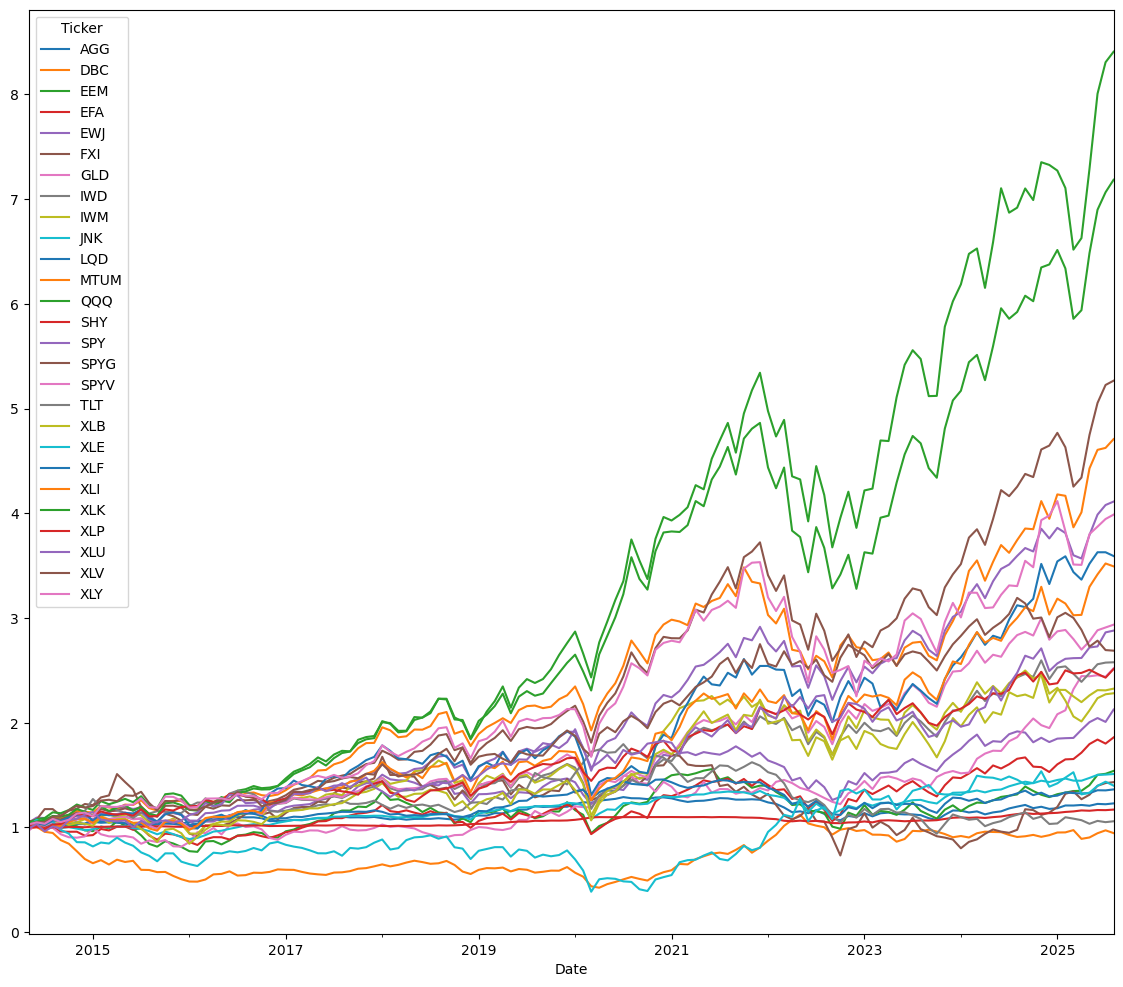

In [3]:
(return_history + 1).cumprod().plot(figsize=(14,12))
plt.show()

In [4]:
# TRAIN , TEST  SPLIT
with open("return_history1.pickle", "wb") as f1:
    pickle.dump(return_history.loc[:'12-31-2019'], f1)

with open("return_history2.pickle", "wb") as f1:
    pickle.dump(return_history.loc['12-31-2019':], f1)
with open("return_history1.pickle", "rb") as f1:
    return_history1 = pickle.load(f1)

display(return_history1)

with open("return_history2.pickle", "rb") as f1:
    return_history2 = pickle.load(f1)

display(return_history2)
    

Ticker,AGG,DBC,EEM,EFA,EWJ,FXI,GLD,IWD,IWM,JNK,...,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-31,0.011790,-0.014388,0.029518,0.015954,0.045126,0.054967,-0.030510,0.014068,0.007859,0.009160,...,0.029496,0.029579,0.016748,0.015027,0.019234,0.037586,0.018084,-0.010877,0.028734,0.028822
2014-06-30,-0.000575,0.021129,0.024018,0.009207,0.046823,0.019898,0.063190,0.025519,0.052720,0.009508,...,-0.002514,0.016145,0.055133,0.024226,0.004749,0.018689,-0.002533,0.044419,0.021215,0.019386
2014-07-31,-0.002509,-0.047404,0.013648,-0.026035,-0.003322,0.092603,-0.036317,-0.017081,-0.060543,-0.023762,...,0.006642,-0.019943,-0.034665,-0.014512,-0.041250,0.016949,-0.033169,-0.068007,0.001315,-0.012736
2014-08-31,0.011496,-0.011453,0.028298,0.001802,-0.016667,0.000000,0.003809,0.036454,0.048296,0.025101,...,0.047238,0.038643,0.021836,0.042392,0.042253,0.032820,0.046128,0.049212,0.048432,0.044468
2014-09-30,-0.006148,-0.072313,-0.077674,-0.038825,-0.002542,-0.054114,-0.061763,-0.020250,-0.059279,-0.024355,...,-0.021123,-0.014052,-0.077514,-0.004034,-0.011464,-0.005170,0.005888,-0.018730,0.004350,-0.027709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,0.027828,-0.046302,-0.037826,-0.019240,-0.007912,-0.048175,0.079123,-0.030053,-0.049310,0.006643,...,0.110491,-0.028283,-0.083254,-0.047080,-0.026471,-0.015352,0.021706,0.050882,-0.005925,-0.009443
2019-09-30,-0.006121,0.014160,0.016920,0.031641,0.052300,0.017382,-0.033948,0.036117,0.020371,0.003840,...,-0.026799,0.031798,0.039343,0.045422,0.030114,0.015728,0.017513,0.042516,-0.001056,0.012714
2019-10-31,0.002081,0.019282,0.041840,0.033891,0.034191,0.033920,0.025635,0.014112,0.027157,-0.000582,...,-0.011132,-0.000172,-0.020946,0.025000,0.011336,0.038992,-0.004233,-0.007569,0.051259,0.001243


Ticker,AGG,DBC,EEM,EFA,EWJ,FXI,GLD,IWD,IWM,JNK,...,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,-0.000468,0.058492,0.077303,0.029954,0.008696,0.085790,0.036559,0.026637,0.027865,0.020067,...,-0.031975,0.028624,0.060262,0.026093,-0.002011,0.043206,0.024127,0.032905,0.034753,0.027632
2020-01-31,0.020290,-0.085893,-0.061511,-0.028226,-0.025152,-0.089159,0.044997,-0.021395,-0.031026,-0.004564,...,0.076912,-0.061706,-0.109926,-0.026641,-0.004419,0.039926,0.003176,0.067471,-0.026703,-0.000797
2020-02-29,0.015847,-0.066529,-0.037758,-0.077652,-0.082944,0.023150,-0.006362,-0.092917,-0.088457,-0.014755,...,0.066265,-0.085199,-0.152882,-0.112483,-0.099001,-0.073009,-0.082146,-0.098579,-0.065866,-0.075726
2020-03-31,-0.005268,-0.173402,-0.157700,-0.141067,-0.067409,-0.076734,-0.002224,-0.174375,-0.214771,-0.110222,...,0.063767,-0.139967,-0.343709,-0.210359,-0.186260,-0.085779,-0.055321,-0.099956,-0.038874,-0.149133
2020-04-30,0.017191,-0.031111,0.073542,0.058174,0.047986,0.027970,0.072611,0.111817,0.138476,0.050348,...,0.012189,0.151865,0.307639,0.094621,0.088121,0.137365,0.069580,0.033387,0.125875,0.188826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30,0.004311,-0.085778,0.001373,0.036951,0.041861,-0.055246,0.054244,-0.031303,-0.023209,-0.000612,...,-0.013605,-0.024308,-0.138577,-0.021080,0.001144,0.016902,0.001959,0.000634,-0.037943,-0.001013
2025-05-31,-0.006069,0.015070,0.040219,0.047906,0.037659,0.033668,-0.000560,0.034838,0.052397,0.018358,...,-0.032106,0.029205,0.012795,0.045119,0.088401,0.099729,0.012220,0.038276,-0.055741,0.083849
2025-06-30,0.014554,0.044540,0.070020,0.023962,0.019656,0.065106,0.004051,0.034303,0.055184,0.019880,...,0.026640,0.022207,0.048693,0.031191,0.036052,0.098479,-0.015750,0.003747,0.021060,0.018672


In [26]:
# Features
def ann_return(r: pd.Series) -> float:
    return (1 + r.mean())**12 - 1

def ann_vol(r: pd.Series) -> float:
    return r.std() * np.sqrt(12)

def downside_vol(r: pd.Series) -> float:
    neg = r[r < 0]
    return (neg.std() * np.sqrt(12)) if len(neg) else np.nan

def max_drawdown(r: pd.Series) -> float:
    c = (1 + r).cumprod()
    peak = c.cummax()
    dd = (c / peak) - 1.0
    return dd.min()

def beta_vs_bench(r: pd.Series, bench: pd.Series) -> float:
    # Align & drop NaNs
    df = pd.concat([r, bench], axis=1).dropna()
    if df.shape[0] < 3 or df.iloc[:,1].std() == 0:
        return np.nan
    cov = np.cov(df.iloc[:,0], df.iloc[:,1])[0,1]
    var = np.var(df.iloc[:,1])
    return cov / var if var != 0 else np.nan

# Choose benchmark (SPY if present)
bench_tkr = 'SPY' if 'SPY' in return_history1.columns else return_history1.columns[0]
bench_train = return_history1[bench_tkr]

# feature table 
features = {}
for tkr in return_history1.columns:
    r = return_history1[tkr].dropna()
    features[tkr] = {
        "AnnReturn": ann_return(r),
        "AnnVol": ann_vol(r),
        "DownsideVol": downside_vol(r),
        "Sharpe": (ann_return(r) / ann_vol(r)) if ann_vol(r) not in (0, np.nan) else np.nan,
        "Sortino": (ann_return(r) / downside_vol(r)) if downside_vol(r) not in (0, np.nan) else np.nan,
        "Skew": skew(r, bias=False) if len(r) > 2 else np.nan,
        "Kurtosis": kurtosis(r, fisher=True, bias=False) if len(r) > 3 else np.nan,
        "MDD": max_drawdown(r),
        "BetaSPY": beta_vs_bench(r, bench_train)
    }

etf_stats = pd.DataFrame(features).T

# Clean up any inf / NaN that might break scaling
etf_stats = etf_stats.replace([np.inf, -np.inf], np.nan)
etf_stats = etf_stats.fillna(etf_stats.median(numeric_only=True))

display(etf_stats.head())

,AnnReturn,AnnVol,DownsideVol,Sharpe,Sortino,Skew,Kurtosis,MDD,BetaSPY
AGG,0.032881,0.031145,0.018506,1.055732,1.776754,0.158136,1.192125,-0.035200,-0.038059
DBC,-0.069376,0.154187,0.109620,-0.449946,-0.632875,-0.354554,-0.044034,-0.520316,0.526838
EEM,0.051553,0.157677,0.085881,0.326953,0.600284,0.198635,-0.054367,-0.301646,0.947264
EFA,0.041978,0.115245,0.072890,0.364247,0.575902,-0.293338,-0.096133,-0.187472,0.849277
EWJ,0.077497,0.118039,0.087498,0.656537,0.885704,-0.445555,0.568983,-0.182090,0.794971


In [6]:
# === Standardize  ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(etf_stats)        # (N_etfs x ~9 features)

In [7]:
# -> PCA(2)
pca = PCA(n_components=2, random_state=42)        
X_pca = pca.fit_transform(X_scaled)               # (N_etfs x 2)
print("Original dim:", X_scaled.shape[1], " -> PCA dim:", X_pca.shape[1])
print("Explained variance by PCs:", pca.explained_variance_ratio_.round(3)," | Cumulative:", pca.explained_variance_ratio_.sum().round(3))

Original dim: 9  -> PCA dim: 2
Explained variance by PCs: [0.476 0.329]  | Cumulative: 0.805


In [8]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


Elbow k (if found): 4  -> using: 4


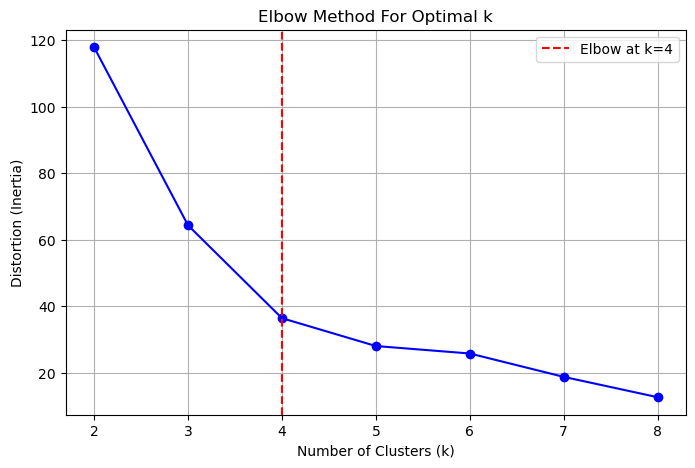

In [9]:
# === Pick k with elbow on PCA space ===
Ks = list(range(2, min(9, len(etf_stats))-0))    
inertias = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_pca)
    inertias.append(km.inertia_)

knee = KneeLocator(Ks, inertias, curve='convex', direction='decreasing')
k_opt = knee.knee if knee.knee else 4  # fallback to 4 if knee not found
print("Elbow k (if found):", knee.knee, " -> using:", k_opt)
# Plotting the elbow curve
plt.figure(figsize=(8,5))
plt.plot(Ks, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.axvline(k_opt, color='red', linestyle='--', label=f'Elbow at k={k_opt}')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# === KMeans on 2D PCA ===
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Attach to stats (train-time clustering; freeze centroids for test assignment later)
etf_stats["PC1"] = X_pca[:,0]
etf_stats["PC2"] = X_pca[:,1]
etf_stats["Cluster"] = clusters
display(etf_stats.sort_values(["Cluster","PC1"]).head(20))

,AnnReturn,AnnVol,DownsideVol,Sharpe,Sortino,Skew,Kurtosis,MDD,BetaSPY,PC1,PC2,Cluster
TLT,0.069760,0.117698,0.063021,0.592707,1.106937,0.559466,1.285619,-0.150853,-0.276989,1.270974,-2.013043,0
JNK,0.039798,0.057992,0.033689,0.686256,1.181317,0.043407,0.265179,-0.127544,0.367157,1.476708,-1.964450,0
LQD,0.050727,0.050973,0.028184,0.995170,1.799843,0.327522,0.336666,-0.055436,0.085287,2.821810,-2.063267,0
AGG,0.032881,0.031145,0.018506,1.055732,1.776754,0.158136,1.192125,-0.035200,-0.038059,3.592323,-1.876360,0
SHY,0.011571,0.009412,0.003692,1.229404,3.134356,0.736772,0.389422,-0.008980,-0.026774,4.836297,-2.829616,0
XLI,0.112647,0.145792,0.102289,0.772657,1.101268,-0.272448,0.909192,-0.176650,1.180908,-0.590991,1.146082,1
XLF,0.135105,0.154888,0.095948,0.872278,1.408115,-0.156485,0.662926,-0.184023,1.149748,-0.365917,1.191774,1
XLV,0.132116,0.130659,0.102193,1.011150,1.292805,-0.665723,0.529191,-0.132131,0.914677,-0.055853,1.569081,1
SPYV,0.105769,0.120578,0.089414,0.877185,1.182913,-0.421503,0.957339,-0.126048,1.027748,0.208904,1.046994,1
IWD,0.094197,0.113997,0.083873,0.826313,1.123097,-0.472138,0.933470,-0.117813,0.974862,0.281917,0.816650,1


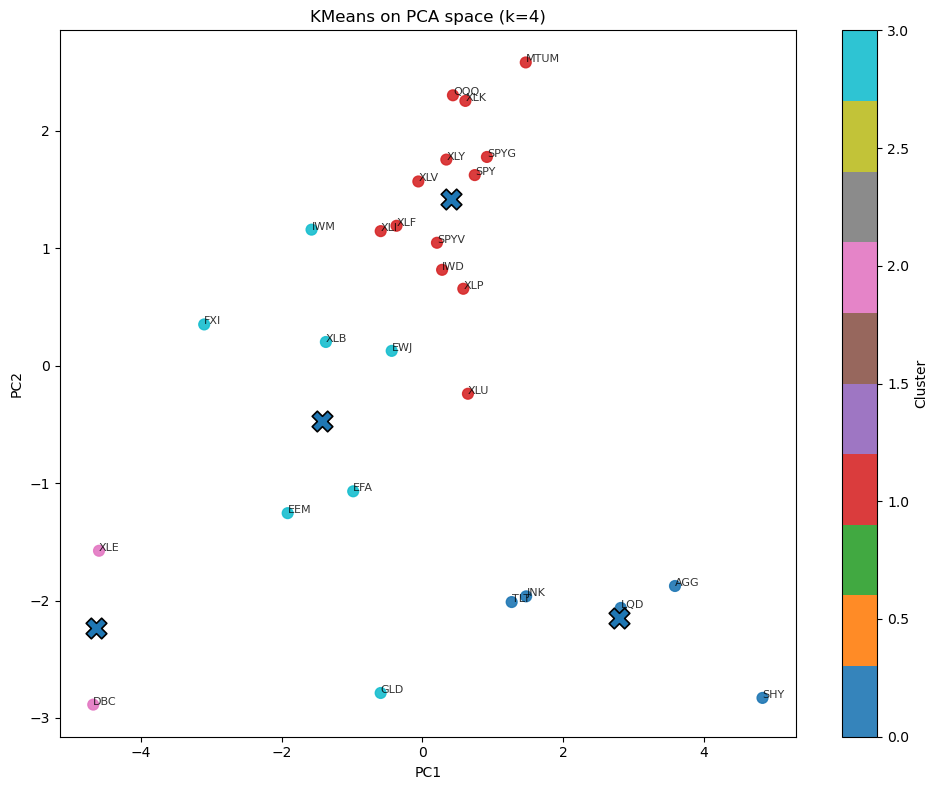

In [11]:
ig, ax = plt.subplots(figsize=(10, 8))

sc = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=labels, s=60, alpha=0.9, cmap="tab10"
)

# Centroids (big X markers)
ax.scatter(
    centroids[:, 0], centroids[:, 1],
    marker="X", s=220, edgecolors="black", linewidths=1.2
)

ax.set_title(f"KMeans on PCA space (k={k_opt})")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
cb = plt.colorbar(sc, ax=ax)
cb.set_label("Cluster")

# Optional: annotate tickers (can get busy)
for i, etf in enumerate(etf_stats.index):
    ax.text(X_pca[i, 0], X_pca[i, 1], etf, fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

In [12]:
# ETF names are in etf_stats.index
clustered_series = pd.Series(index=etf_stats.index, data=kmeans.labels_.flatten())
clustered_series_all = clustered_series.copy()

print("Clustered Series Sample:")
print(clustered_series.head(27))


Clustered Series Sample:
AGG     0
DBC     2
EEM     3
EFA     3
EWJ     3
FXI     3
GLD     3
IWD     1
IWM     3
JNK     0
LQD     0
MTUM    1
QQQ     1
SHY     0
SPY     1
SPYG    1
SPYV    1
TLT     0
XLB     3
XLE     2
XLF     1
XLI     1
XLK     1
XLP     1
XLU     1
XLV     1
XLY     1
dtype: int32


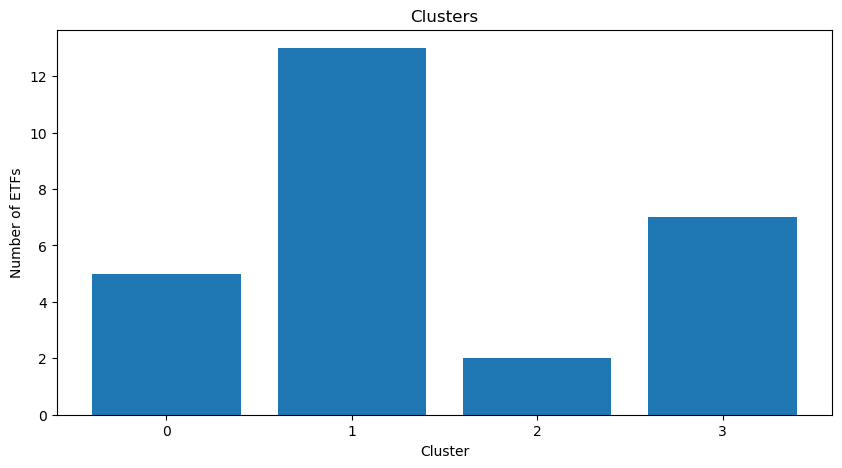

In [13]:
# Plot the Number of ETFs per cluster
plt.figure(figsize=(10, 5))
cluster_counts = clustered_series.value_counts().sort_index()
plt.bar(range(len(cluster_counts)), cluster_counts.values)
plt.xticks(range(len(cluster_counts)), labels=cluster_counts.index)
plt.title("Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of ETFs")
plt.show()

In [14]:
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm

def calculate_cointegration(series_1, series_2):
    coint_res = coint(series_1, series_2)
    coint_t = coint_res[0]
    p_value = coint_res[1]

    critical_value = coint_res[2][1]  # 5% level
    model = sm.OLS(series_1, series_2).fit()
    hedge_ratio = model.params[0]
    coint_flag = 1 if p_value < 0.05 and coint_t < critical_value else 0
    return coint_flag, hedge_ratio

from itertools import combinations


tested_pairs = set()
cointegrated_pairs = []

data = return_history1.cumsum()  # Use cumulative returns (like prices)

# No filtering – use all clustered ETFs
for base_asset, compare_asset in combinations(clustered_series.index, 2):
    base_label = clustered_series[base_asset]
    compare_label = clustered_series[compare_asset]

    test_pair = tuple(sorted((base_asset, compare_asset)))
    if base_label == compare_label and test_pair not in tested_pairs:
        series_1 = data[base_asset].values.astype(float)
        series_2 = data[compare_asset].values.astype(float)

        coint_flag, hedge_ratio = calculate_cointegration(series_1, series_2)
        if coint_flag == 1:
            cointegrated_pairs.append({
                "base_asset": base_asset,
                "compare_asset": compare_asset,
                "label": base_label,
                "hedge_ratio": hedge_ratio
            })
        tested_pairs.add(test_pair)
df_coint = pd.DataFrame(cointegrated_pairs).sort_values(by="label").reset_index(drop=True)
display(df_coint)

,base_asset,compare_asset,label,hedge_ratio
0,IWD,XLI,1,0.787006
1,IWD,XLK,1,0.467920
2,QQQ,SPY,1,1.548062
3,QQQ,SPYG,1,1.296530
4,SPY,XLK,1,0.640121
5,SPYG,XLV,1,1.091922
6,SPYV,XLK,1,0.493558
7,SPYV,XLU,1,0.826635
8,XLF,XLI,1,1.177813
9,XLP,XLU,1,0.871911


In [15]:
import numpy as np
import pandas as pd

# Use cumulative returns as prices (assuming return_history1 is monthly returns DataFrame)
price_data = (1 + return_history1).cumprod()

# Backtest function (mean reversion)
def backtest_pair(series_1, series_2, hedge_ratio, entry_z=1.0, exit_z=0.0, lookback=6):
    spread = series_1 - hedge_ratio * series_2
    spread_mean = spread.rolling(window=lookback).mean()
    spread_std = spread.rolling(window=lookback).std()
    z_score = (spread - spread_mean) / spread_std

    position = 0
    pnl = []
    positions = []

    for t in range(1, len(spread)):
        if position == 0:
            if z_score.iloc[t] > entry_z:
                position = -1  # short spread
            elif z_score.iloc[t] < -entry_z:
                position = 1  # long spread
        elif position == 1 and z_score.iloc[t] >= exit_z:
            position = 0
        elif position == -1 and z_score.iloc[t] <= exit_z:
            position = 0

        spread_return = spread.iloc[t] - spread.iloc[t-1]
        pnl.append(position * spread_return)
        positions.append(position)

    pnl = np.array(pnl)
    if pnl.std() > 0:
        sharpe = np.mean(pnl) / pnl.std() * np.sqrt(12)  # Annualized Sharpe (monthly data)
    else:
        sharpe = 0

    total_pnl = pnl.sum()
    num_trades = np.sum(np.abs(np.diff(positions)))

    return sharpe, total_pnl, num_trades

# Parameter ranges
entry_values = [1.0, 1.5, 2.0, 2.5]
exit_values = [0.0, 0.2, 0.5, 1.0]

def tune_pair(s1, s2, hedge_ratio, entry_values, exit_values):
    best_sharpe = -np.inf
    best_params = None
    best_metrics = None

    for entry_z in entry_values:
        for exit_z in exit_values:
            if exit_z >= entry_z:
                continue
            sharpe, total_pnl, trades = backtest_pair(s1, s2, hedge_ratio, entry_z, exit_z)
            if sharpe > best_sharpe:
                best_sharpe = sharpe
                best_params = (entry_z, exit_z)
                best_metrics = (sharpe, total_pnl, trades)

    return best_params, best_metrics

results_tuned = []

for _, row in df_coint.iterrows():
    s1 = price_data[row['base_asset']]
    s2 = price_data[row['compare_asset']]
    hr = row['hedge_ratio']

    (best_entry, best_exit), (sharpe, pnl, trades) = tune_pair(s1, s2, hr, entry_values, exit_values)
    results_tuned.append({
        'base_asset': row['base_asset'],
        'compare_asset': row['compare_asset'],
        'hedge_ratio': hr,
        'best_entry_z': best_entry,
        'best_exit_z': best_exit,
        'sharpe': sharpe,
        'total_pnl': pnl,
        'num_trades': trades
    })

results_tuned_df = pd.DataFrame(results_tuned).sort_values('sharpe', ascending=False).reset_index(drop=True)
print(results_tuned_df.head())


  base_asset compare_asset  hedge_ratio  best_entry_z  best_exit_z  sharpe  \
0        IWD           XLI     0.787006           2.0          0.0       0   
1        IWD           XLK     0.467920           2.0          0.0       0   
2        QQQ           SPY     1.548062           2.0          0.0       0   
3        QQQ          SPYG     1.296530           2.0          0.0       0   
4        SPY           XLK     0.640121           2.0          0.0       0   

   total_pnl  num_trades  
0        0.0           0  
1        0.0           0  
2        0.0           0  
3        0.0           0  
4        0.0           0  


In [16]:
s1 = price_data[df_coint.loc[0, 'base_asset']]
s2 = price_data[df_coint.loc[0, 'compare_asset']]
hr = df_coint.loc[0, 'hedge_ratio']

spread = s1 - hr * s2
lookback = 6
spread_mean = spread.rolling(window=lookback).mean()
spread_std = spread.rolling(window=lookback).std()
z_score = (spread - spread_mean) / spread_std

print(f"Z-score min: {z_score.min()}, max: {z_score.max()}")


Z-score min: -1.9907345004101578, max: 1.8976264007163404


In [17]:

# Use cumulative returns as prices
price_data = (1 + return_history1).cumprod()

def backtest_pair(series_1, series_2, hedge_ratio, entry_z=1.0, exit_z=0.0, lookback=6,
                  use_returns=True, ann_factor=12, tx_cost_per_change=0.0):
    """
    Cointegration spread mean-reversion backtest.
    - Position for period t is decided using signal at t-1 (no look-ahead).
    - PnL for period t uses that position and the t return (or spread change).
    - Optional: use_returns=True uses r_A - beta*r_B; else uses spread level diff.
    - tx_cost_per_change: cost applied whenever position changes (per change).
    """
    # Build spread & z-score
    spread = series_1 - hedge_ratio * series_2
    ma = spread.rolling(lookback).mean()
    sd = spread.rolling(lookback).std().replace(0, np.nan)
    z = (spread - ma) / sd

    # Return version (recommended)
    if use_returns:
        r1 = series_1.pct_change()
        r2 = series_2.pct_change()
        spread_ret = r1 - hedge_ratio * r2
    else:
        spread_ret = spread.diff()

    position_prev = 0
    pnl = []
    positions = []

    # start after warm-up
    for t in range(lookback, len(spread)):
        # 1) Earn PnL for t using position decided at t-1
        r_t = spread_ret.iloc[t]
        pnl_t = 0.0 if np.isnan(r_t) else position_prev * r_t
        pnl.append(pnl_t)
        positions.append(position_prev)

        # 2) Decide next period's position using today's signal
        zt = z.iloc[t]
        position_new = position_prev
        if not np.isnan(zt):
            if position_prev == 0:
                if zt > entry_z:
                    position_new = -1   # short spread
                elif zt < -entry_z:
                    position_new = 1    # long spread
            elif position_prev == 1 and zt >= exit_z:
                position_new = 0
            elif position_prev == -1 and zt <= exit_z:
                position_new = 0

        # 3) Apply transaction cost if position changed
        if tx_cost_per_change and position_new != position_prev:
            pnl[-1] -= tx_cost_per_change  # cost at the moment of change

        position_prev = position_new

    pnl = np.array(pnl, dtype=float)
    sharpe = 0.0 if pnl.std() == 0 else pnl.mean() / pnl.std() * np.sqrt(ann_factor)
    total_pnl = float(np.nansum(pnl))
    num_trades = int(np.sum(np.abs(np.diff(positions))))  # position changes

    return sharpe, total_pnl, num_trades


results = []
for _, row in df_coint.iterrows():
    s1 = price_data[row['base_asset']]
    s2 = price_data[row['compare_asset']]
    hr = row['hedge_ratio']

    sharpe, total_pnl, trades = backtest_pair(s1, s2, hr)

    results.append({
        'base_asset': row['base_asset'],
        'compare_asset': row['compare_asset'],
        'hedge_ratio': hr,
        'sharpe': sharpe,
        'total_pnl': total_pnl,
        'num_trades': trades,
    })

results_df = pd.DataFrame(results).sort_values('sharpe', ascending=False).reset_index(drop=True)
print(results_df)


   base_asset compare_asset  hedge_ratio    sharpe  total_pnl  num_trades
0         XLP           XLU     0.871911  1.384541   0.575846          26
1        SPYV           XLU     0.826635  0.829090   0.455584          25
2        SPYV           XLK     0.493558  0.818234   0.288397          26
3         SPY           XLK     0.640121  0.713825   0.164353          19
4         DBC           XLE     2.267445  0.652415   1.000522          19
5         QQQ           SPY     1.548062  0.489865   0.159283          24
6         IWD           XLK     0.467920  0.475828   0.147471          21
7         IWD           XLI     0.787006  0.471273   0.081707          22
8         XLF           XLI     1.177813  0.383315   0.164804          23
9         XLV           XLY     0.838557  0.316496   0.128031          21
10        IWM           XLB     1.317711  0.268770   0.143271          18
11        QQQ          SPYG     1.296530  0.132875   0.022048          19
12       SPYG           XLV     1.0919

IS  -> AnnRet 9.94%  AnnVol 10.00%  Sharpe 0.99  (scale 2.40, pre-vol 4.16%)
OOS -> AnnRet 7.33%  AnnVol 10.00%  Sharpe 0.73  (scale 2.10, pre-vol 4.77%)


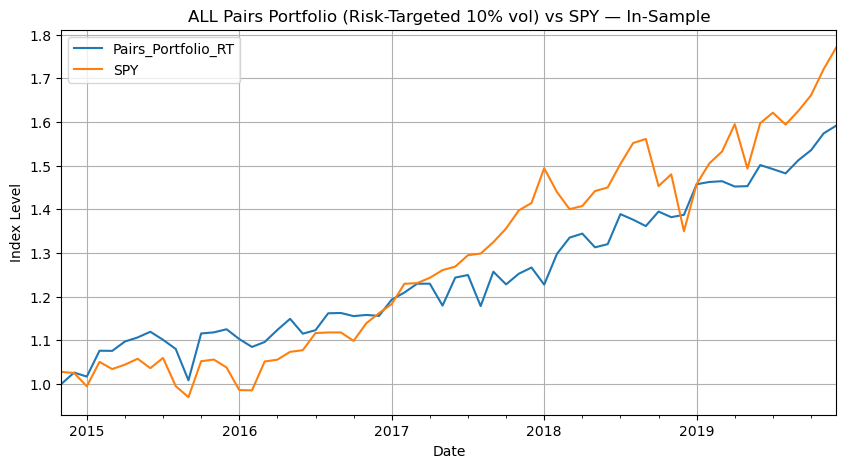

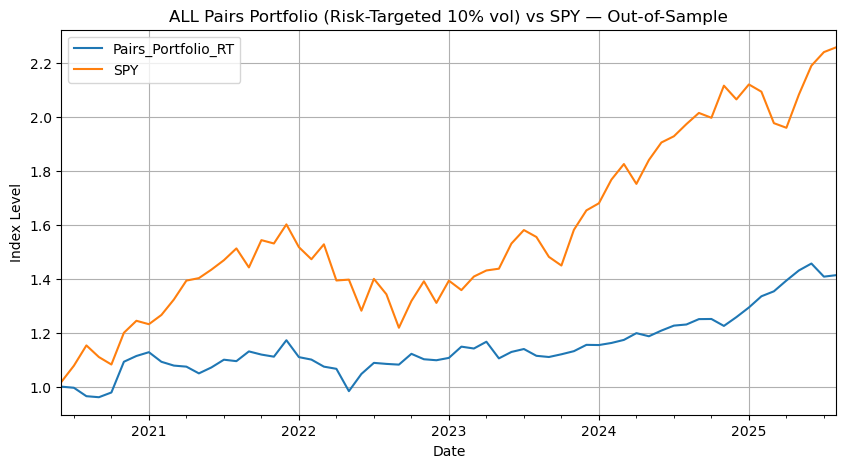

In [18]:
ANN = 12
TARGET_VOL = 0.10  # 10% annualized target

# --- No-look-ahead pair return series (position decided at t-1) ---
def pair_returns_series(s1, s2, beta, entry_z=1, exit_z=0, lookback=6):
    spread = s1 - beta*s2
    ma = spread.rolling(lookback).mean()
    sd = spread.rolling(lookback).std().replace(0, np.nan)
    z = (spread - ma) / sd

    r1 = s1.pct_change()
    r2 = s2.pct_change()
    spread_ret = r1 - beta*r2

    pos_prev = 0
    rets = []
    for t in range(lookback, len(spread)):
        # earn period t with position from t-1
        rt = spread_ret.iloc[t]
        rets.append(0.0 if np.isnan(rt) else pos_prev * rt)

        # update position using today's signal for next period
        zt = z.iloc[t]
        if np.isnan(zt):
            continue
        if pos_prev == 0:
            if zt > entry_z:       pos_prev = -1
            elif zt < -entry_z:    pos_prev = 1
        elif pos_prev == 1 and zt >= exit_z:
            pos_prev = 0
        elif pos_prev == -1 and zt <= exit_z:
            pos_prev = 0

    return pd.Series(rets, index=s1.index[lookback:])

def ann_stats(r):
    mu, sd = r.mean(), r.std()
    ann_ret = (1 + mu)**ANN - 1
    ann_vol = sd * np.sqrt(ANN)
    sharpe  = 0.0 if ann_vol == 0 else ann_ret / ann_vol
    return ann_ret, ann_vol, sharpe


def build_pairs_matrix(price_df, results_df, entry_z=1.2, exit_z=0.2, lookback=6):
    series = []
    for _, row in results_df.iterrows():
        a, b, beta = row['base_asset'], row['compare_asset'], row['hedge_ratio']
        s1, s2 = price_df[a], price_df[b]
        pr = pair_returns_series(s1, s2, beta, entry_z, exit_z, lookback).rename(f"{a}-{b}")
        series.append(pr)
    if not series:
        return None
    mat = pd.concat(series, axis=1).fillna(0.0)  # fill gaps as no-position
    return mat

price_is  = (1 + return_history1).cumprod()
price_oos = (1 + return_history2).cumprod() 

pairs_mat_is  = build_pairs_matrix(price_is, results_df, entry_z=1.2, exit_z=0.2, lookback=6)
pairs_mat_oos = build_pairs_matrix(price_oos, results_df, entry_z=1.2, exit_z=0.2, lookback=6) if price_oos is not None else None

# Equal-weight across all pairs
port_is_raw  = pairs_mat_is.mean(axis=1)
port_oos_raw = pairs_mat_oos.mean(axis=1) if pairs_mat_oos is not None else None

# --- Risk target to 10% annual vol ---
def risk_target(r, target_vol=TARGET_VOL):
    realized = r.std() * np.sqrt(ANN)
    scale = 0.0 if realized == 0 else target_vol / realized
    return r * scale, scale, realized

port_is_rt, scale_is, vol_is = risk_target(port_is_raw, TARGET_VOL)
if port_oos_raw is not None:
    port_oos_rt, scale_oos, vol_oos = risk_target(port_oos_raw, TARGET_VOL)

# --- Metrics ---
ar_is, av_is, sh_is = ann_stats(port_is_rt)
print(f"IS  -> AnnRet {ar_is:.2%}  AnnVol {av_is:.2%}  Sharpe {sh_is:.2f}  (scale {scale_is:.2f}, pre-vol {vol_is:.2%})")
if port_oos_raw is not None:
    ar_oos, av_oos, sh_oos = ann_stats(port_oos_rt)
    print(f"OOS -> AnnRet {ar_oos:.2%}  AnnVol {av_oos:.2%}  Sharpe {sh_oos:.2f}  (scale {scale_oos:.2f}, pre-vol {vol_oos:.2%})")

# --- Plot vs SPY ---
bench = 'SPY' if 'SPY' in return_history1.columns else return_history1.columns[0]

bench_is = return_history1[bench].loc[port_is_rt.index]
to_plot_is = pd.concat({
    "Pairs_Portfolio_RT": (1 + port_is_rt).cumprod(),
    "SPY":                (1 + bench_is).cumprod()
}, axis=1)
ax = to_plot_is.plot(figsize=(10,5), title="ALL Pairs Portfolio (Risk-Targeted 10% vol) vs SPY — In-Sample")
ax.set_ylabel("Index Level"); ax.grid(True); plt.show()

if port_oos_raw is not None:
    bench_oos = return_history2[bench].loc[port_oos_rt.index]
    to_plot_oos = pd.concat({
        "Pairs_Portfolio_RT": (1 + port_oos_rt).cumprod(),
        "SPY":                (1 + bench_oos).cumprod()
    }, axis=1)
    ax = to_plot_oos.plot(figsize=(10,5), title="ALL Pairs Portfolio (Risk-Targeted 10% vol) vs SPY — Out-of-Sample")
    ax.set_ylabel("Index Level"); ax.grid(True); plt.show()

In [20]:
print("train last:", return_history1.index.max())
print("test  first:", return_history2.index.min())
print(return_history1.index[-3:])
print(return_history2.index[:3])

train last: 2019-12-31 00:00:00
test  first: 2019-12-31 00:00:00
DatetimeIndex(['2019-10-31', '2019-11-30', '2019-12-31'], dtype='datetime64[ns]', name='Date', freq='ME')
DatetimeIndex(['2019-12-31', '2020-01-31', '2020-02-29'], dtype='datetime64[ns]', name='Date', freq='ME')


In [21]:
split_date = pd.Timestamp('2019-12-31')
return_history1 = return_history.loc[:split_date].copy()
return_history2 = return_history.loc[split_date + pd.offsets.MonthEnd(1):].copy()

In [22]:
def clean_idx(df):
    return (df.copy()
              .sort_index()
              .loc[~df.index.duplicated(keep='last')])

return_history1 = clean_idx(return_history1)
return_history2 = clean_idx(return_history2)

In [24]:
assert return_history1.index.max() < return_history2.index.min()
assert return_history1.index.is_monotonic_increasing
assert return_history2.index.is_monotonic_increasing
assert return_history1.index.is_unique and return_history2.index.is_unique

In [27]:
ANN = 12  # based on monthly data

def vol_target(r: pd.Series, target=0.10, ann=ANN):
    pre = r.std() * np.sqrt(ann)
    scale = 0.0 if (pre == 0 or np.isnan(pre)) else target / pre
    return r * scale, scale, pre

def max_drawdown(r: pd.Series) -> float:
    c = (1 + r).cumprod()
    peak = c.cummax()
    dd = c/peak - 1.0
    return float(-dd.min())  # +Positive value (e.g., 0.23 represents -23%)

def ann_stats(r: pd.Series, ann=ANN):
    r = r.dropna()
    mu, sd = r.mean(), r.std()
    ann_ret = (1 + mu)**ann - 1
    ann_vol = sd * np.sqrt(ann)
    sharpe  = 0.0 if ann_vol == 0 else ann_ret / ann_vol
    mdd     = max_drawdown(r)
    return ann_ret, ann_vol, sharpe, mdd

In [29]:
# return_history1 for the IS period and return_history2 for the OOS period are already available.
spy_is  = return_history1['SPY'].copy()
spy_oos = return_history2['SPY'].copy()

# Align our portfolio return series with the index (to prevent missing data)
spy_is  = spy_is.reindex(port_is_rt.index).dropna()
spy_oos = spy_oos.reindex(port_oos_rt.index).dropna()

# Equal 10% volatility targeting
spy_is_rt,  _, _ = vol_target(spy_is,  target=0.10)
spy_oos_rt, _, _ = vol_target(spy_oos, target=0.10)

In [30]:
# IS 표
rows_is = []
rows_is.append(('Pairs_Portfolio_RT10%',) + ann_stats(port_is_rt))
rows_is.append(('SPY_RT10%',)            + ann_stats(spy_is_rt))

perf_is = pd.DataFrame(rows_is, columns=['Strategy','AnnRet','AnnVol','Sharpe','MDD']).set_index('Strategy')
display(perf_is.applymap(lambda x: round(x,4)))

# OOS 표
rows_oos = []
rows_oos.append(('Pairs_Portfolio_RT10%',) + ann_stats(port_oos_rt))
rows_oos.append(('SPY_RT10%',)             + ann_stats(spy_oos_rt))

perf_oos = pd.DataFrame(rows_oos, columns=['Strategy','AnnRet','AnnVol','Sharpe','MDD']).set_index('Strategy')
display(perf_oos.applymap(lambda x: round(x,4)))

/var/folders/07/r8zpfqg11mg787nk0fylqryr0000gn/T/ipykernel_6840/3356596984.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(perf_is.applymap(lambda x: round(x,4)))


,AnnRet,AnnVol,Sharpe,MDD
Strategy,,,,
Pairs_Portfolio_RT10%,0.0994,0.1,0.9940,0.0993
SPY_RT10%,0.1048,0.1,1.0481,0.1152


/var/folders/07/r8zpfqg11mg787nk0fylqryr0000gn/T/ipykernel_6840/3356596984.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(perf_oos.applymap(lambda x: round(x,4)))


,AnnRet,AnnVol,Sharpe,MDD
Strategy,,,,
Pairs_Portfolio_RT10%,0.0733,0.1,0.7331,0.1611
SPY_RT10%,0.1113,0.1,1.1129,0.1540


Text(0, 0.5, 'Index Level')

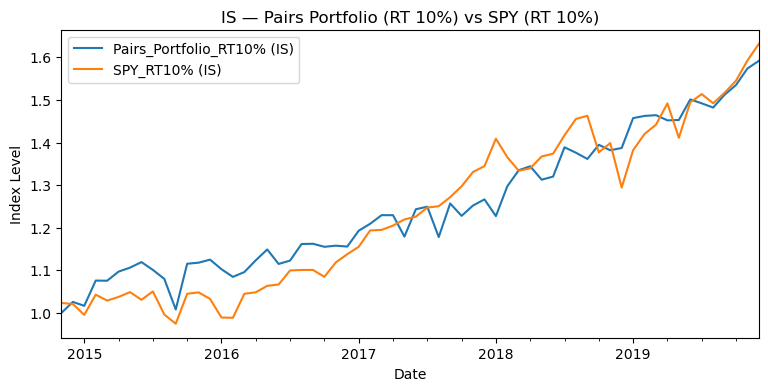

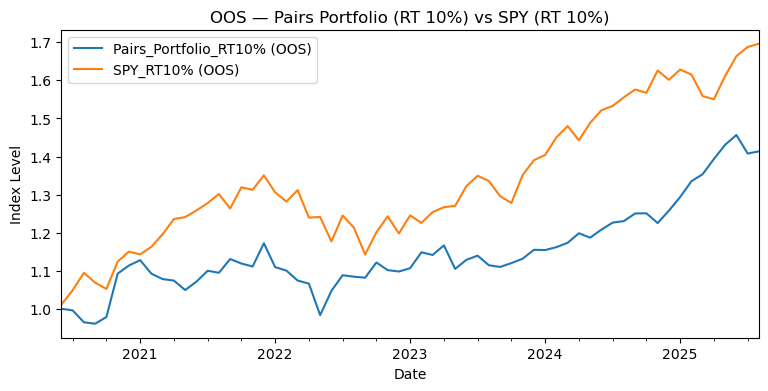

In [31]:
ax = (1 + pd.concat({
    'Pairs_Portfolio_RT10% (IS)':  port_is_rt,
    'SPY_RT10% (IS)':              spy_is_rt
}, axis=1).dropna()).cumprod().plot(figsize=(9,4))
ax.set_title("IS — Pairs Portfolio (RT 10%) vs SPY (RT 10%)")
ax.set_ylabel("Index Level")

ax = (1 + pd.concat({
    'Pairs_Portfolio_RT10% (OOS)': port_oos_rt,
    'SPY_RT10% (OOS)':             spy_oos_rt
}, axis=1).dropna()).cumprod().plot(figsize=(9,4))
ax.set_title("OOS — Pairs Portfolio (RT 10%) vs SPY (RT 10%)")
ax.set_ylabel("Index Level")

IS Accuracy: 0.6083877995642701
OOS Accuracy: 0.5517429193899782

IS Stats (LGBM): (0.08906669664220512, 0.0796488257287169, 1.118242432670199)
OOS Stats (LGBM): (0.08763698956413002, 0.12314870856323043, 0.711635473782764)


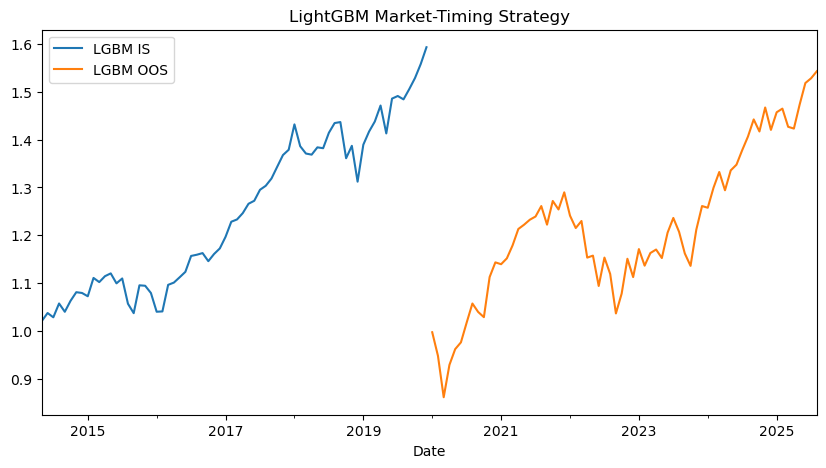

In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# ==== 1. Data Preparation (ETF characteristics + next month's return direction) ====
# Use the existing return_history1 (IS) and return_history2 (OOS)
# Convert the features dictionary to a DataFrame
features_df = pd.DataFrame(features).T  # ETF x features
features_df = features_df.dropna()

# Target generation: 1 if next month's return is positive, 0 if negative
# IS/OOS split
target_is = (return_history1.shift(-1) > 0).astype(int).stack().reset_index()
target_is.columns = ['Date', 'Ticker', 'Target']
target_oos = (return_history2.shift(-1) > 0).astype(int).stack().reset_index()
target_oos.columns = ['Date', 'Ticker', 'Target']

# Feature merging
X_is = features_df.loc[target_is['Ticker']].reset_index(drop=True)
y_is = target_is['Target']

X_oos = features_df.loc[target_oos['Ticker']].reset_index(drop=True)
y_oos = target_oos['Target']

# ==== 2. Train LightGBM model ====
lgb_train = lgb.Dataset(X_is, label=y_is)
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'learning_rate': 0.05,
    'num_leaves': 15,
    'max_depth': -1,
    'verbose': -1
}
model = lgb.train(params, lgb_train, num_boost_round=100)

# ==== 3. prediction ====
pred_is = (model.predict(X_is) > 0.5).astype(int)
pred_oos = (model.predict(X_oos) > 0.5).astype(int)

# ==== 4. Simple performance evaluation ====
print("IS Accuracy:", accuracy_score(y_is, pred_is))
print("OOS Accuracy:", accuracy_score(y_oos, pred_oos))

# ==== 5. Portfolio backtest ====
# IS
pred_ret_is = return_history1.stack().reset_index()
pred_ret_is.columns = ['Date', 'Ticker', 'Return']
pred_ret_is['Signal'] = pred_is
pred_ret_is['StrategyRet'] = pred_ret_is['Return'] * pred_ret_is['Signal']
port_ret_is = pred_ret_is.groupby('Date')['StrategyRet'].mean()

# OOS
pred_ret_oos = return_history2.stack().reset_index()
pred_ret_oos.columns = ['Date', 'Ticker', 'Return']
pred_ret_oos['Signal'] = pred_oos
pred_ret_oos['StrategyRet'] = pred_ret_oos['Return'] * pred_ret_oos['Signal']
port_ret_oos = pred_ret_oos.groupby('Date')['StrategyRet'].mean()

# ==== 6. Summary of results ====
def ann_stats_simple(r):
    mu = r.mean()
    sd = r.std()
    ann_ret = (1 + mu)**12 - 1
    ann_vol = sd * np.sqrt(12)
    sharpe = ann_ret / ann_vol if ann_vol != 0 else 0
    return ann_ret, ann_vol, sharpe

print("\nIS Stats (LGBM):", ann_stats_simple(port_ret_is))
print("OOS Stats (LGBM):", ann_stats_simple(port_ret_oos))

# ==== 7. graph ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
(1 + port_ret_is).cumprod().plot(label="LGBM IS")
(1 + port_ret_oos).cumprod().plot(label="LGBM OOS")
plt.legend()
plt.title("LightGBM Market-Timing Strategy")
plt.show()

In [35]:
# LGBM performance values
is_stats = (0.08906669664220512, 0.0796488257287169, 1.1182424326701999)
oos_stats = (0.08763698956413002, 0.12314870856323043, 0.711635473782764)

# Convert to DataFrame
import pandas as pd

df_lgbm = pd.DataFrame({
    'AnnRet': [is_stats[0], oos_stats[0]],
    'AnnVol': [is_stats[1], oos_stats[1]],
    'Sharpe': [is_stats[2], oos_stats[2]]
}, index=['IS', 'OOS'])

# Round to 4 decimal places
df_lgbm = df_lgbm.round(4)

# Print
print(df_lgbm)

     AnnRet  AnnVol  Sharpe
IS   0.0891  0.0796  1.1182
OOS  0.0876  0.1231  0.7116


In [36]:
df_lgbm['Strategy'] = 'LGBM Market-Timing'
df_lgbm = df_lgbm[['Strategy', 'AnnRet', 'AnnVol', 'Sharpe']]
print(df_lgbm)

               Strategy  AnnRet  AnnVol  Sharpe
IS   LGBM Market-Timing  0.0891  0.0796  1.1182
OOS  LGBM Market-Timing  0.0876  0.1231  0.7116


In [37]:
# 1) Create performance table for the existing Pairs Portfolio
pairs_is = perf_is.copy()
pairs_is['Period'] = 'IS'
pairs_oos = perf_oos.copy()
pairs_oos['Period'] = 'OOS'

pairs_all = pd.concat([pairs_is, pairs_oos]).reset_index()
pairs_all.rename(columns={'Strategy': 'Strategy', 
                          'AnnRet': 'AnnRet', 
                          'AnnVol': 'AnnVol', 
                          'Sharpe': 'Sharpe', 
                          'MDD': 'MDD'}, inplace=True)

# 2) Match the format of the LGBM performance table
df_lgbm_reset = df_lgbm.reset_index()
df_lgbm_reset.rename(columns={'index': 'Period'}, inplace=True)
df_lgbm_reset['Strategy'] = 'LGBM Market-Timing'
df_lgbm_reset['MDD'] = None  # Leave blank if MDD is not calculated

# 3) Merge the two tables
final_perf = pd.concat([pairs_all, df_lgbm_reset], ignore_index=True)

# 4) Arrange for better presentation
final_perf = final_perf[['Strategy', 'Period', 'AnnRet', 'AnnVol', 'Sharpe', 'MDD']]

# 5) print
print(final_perf.round(4))

                Strategy Period  AnnRet  AnnVol  Sharpe     MDD
0  Pairs_Portfolio_RT10%     IS  0.0994  0.1000  0.9940  0.0993
1              SPY_RT10%     IS  0.1048  0.1000  1.0481  0.1152
2  Pairs_Portfolio_RT10%    OOS  0.0733  0.1000  0.7331  0.1611
3              SPY_RT10%    OOS  0.1113  0.1000  1.1129  0.1540
4     LGBM Market-Timing     IS  0.0891  0.0796  1.1182     NaN
5     LGBM Market-Timing    OOS  0.0876  0.1231  0.7116     NaN


/var/folders/07/r8zpfqg11mg787nk0fylqryr0000gn/T/ipykernel_6840/1996419520.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_perf = pd.concat([pairs_all, df_lgbm_reset], ignore_index=True)


In [39]:
# --- 1) If LGBM OOS/IS return series are available, add MDD calculation ---
def max_drawdown_series(r):
    c = (1+r).cumprod()
    return float(-(c / c.cummax() - 1).min())

# If the LGBM portfolio return series is the variable created earlier:
mdd_lgbm_is  = max_drawdown_series(port_ret_is)
mdd_lgbm_oos = max_drawdown_series(port_ret_oos)

# --- 2)Fill in MDD in the LGBM table and organize type/sorting ---
df_lgbm_reset.loc[df_lgbm_reset['Period']=='IS',  'MDD'] = mdd_lgbm_is
df_lgbm_reset.loc[df_lgbm_reset['Period']=='OOS', 'MDD'] = mdd_lgbm_oos

# Ensure numeric type (to prevent warnings)
for col in ['AnnRet','AnnVol','Sharpe','MDD']:
    df_lgbm_reset[col] = pd.to_numeric(df_lgbm_reset[col], errors='coerce')

# --- 3) Rewrite the final table and sort the order ---
final_perf = pd.concat([pairs_all, df_lgbm_reset], ignore_index=True)
final_perf = final_perf[['Strategy','Period','AnnRet','AnnVol','Sharpe','MDD']]

# Fix the order of periods (IS -> OOS)
final_perf['Period'] = pd.Categorical(final_perf['Period'], categories=['IS','OOS'], ordered=True)
final_perf = final_perf.sort_values(['Strategy','Period']).reset_index(drop=True)

def fmt_pct(x): 
    return f"{x:.2%}" if pd.notnull(x) else ""

styled = final_perf.copy()
styled['AnnRet'] = styled['AnnRet'].map(fmt_pct)
styled['AnnVol'] = styled['AnnVol'].map(fmt_pct)
styled['MDD']    = styled['MDD'].map(fmt_pct)

print(styled)

                Strategy Period  AnnRet  AnnVol    Sharpe     MDD
0     LGBM Market-Timing     IS   8.91%   7.96%  1.118200   8.68%
1     LGBM Market-Timing    OOS   8.76%  12.31%  0.711600  19.64%
2  Pairs_Portfolio_RT10%     IS   9.94%  10.00%  0.994034   9.93%
3  Pairs_Portfolio_RT10%    OOS   7.33%  10.00%  0.733148  16.11%
4              SPY_RT10%     IS  10.48%  10.00%  1.048098  11.52%
5              SPY_RT10%    OOS  11.13%  10.00%  1.112941  15.40%


Final Performance Table:
                Strategy Period  AnnRet  AnnVol    Sharpe     MDD
0     LGBM Market-Timing     IS   8.91%   7.96%  1.118200   8.68%
1     LGBM Market-Timing    OOS   8.76%  12.31%  0.711600  19.64%
2  Pairs_Portfolio_RT10%     IS   9.94%  10.00%  0.994034   9.93%
3  Pairs_Portfolio_RT10%    OOS   7.33%  10.00%  0.733148  16.11%
4              SPY_RT10%     IS  10.48%  10.00%  1.048098  11.52%
5              SPY_RT10%    OOS  11.13%  10.00%  1.112941  15.40%


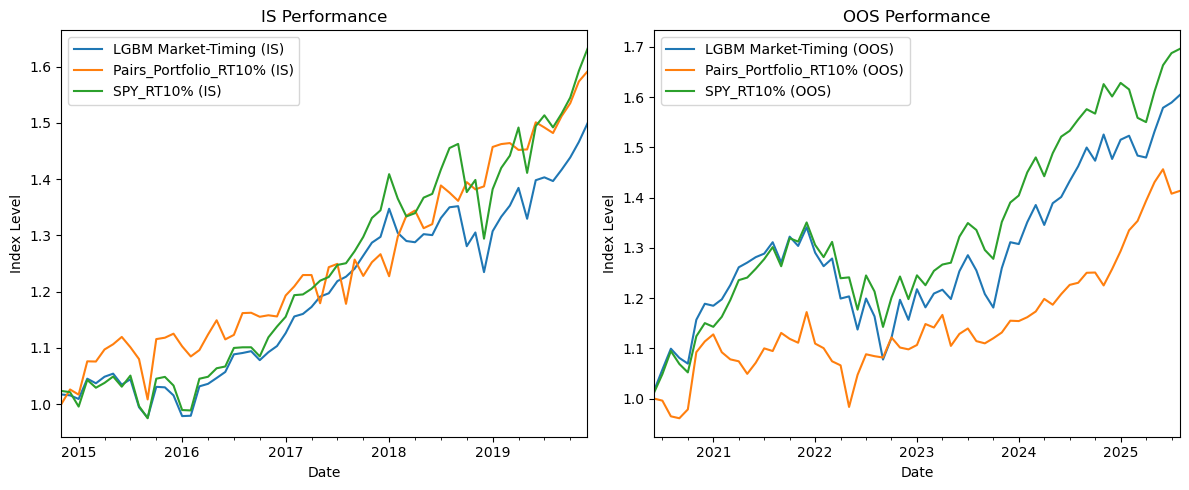

In [40]:
 import matplotlib.pyplot as plt

# 1. Print the final performance table (already stored in the styled variable)
print("Final Performance Table:")
print(styled)

# 2. Cumulative index graph (IS)
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
(1 + pd.concat({
    'LGBM Market-Timing (IS)': port_ret_is,
    'Pairs_Portfolio_RT10% (IS)': port_is_rt,
    'SPY_RT10% (IS)': spy_is_rt
}, axis=1).dropna()).cumprod().plot(ax=plt.gca())
plt.title("IS Performance")
plt.ylabel("Index Level")

# 3. Cumulative index chart (OOS)
plt.subplot(1, 2, 2)
(1 + pd.concat({
    'LGBM Market-Timing (OOS)': port_ret_oos,
    'Pairs_Portfolio_RT10% (OOS)': port_oos_rt,
    'SPY_RT10% (OOS)': spy_oos_rt
}, axis=1).dropna()).cumprod().plot(ax=plt.gca())
plt.title("OOS Performance")
plt.ylabel("Index Level")

plt.tight_layout()
plt.show()